In [6]:
#Disease prediction

#importing required libraries
import pandas as pd
from sklearn.model_selection import train_test_split


# Reading the train.csv by removing the
# last column since it's an empty column
path = "E:\Med dataset\Training2.csv"
dataset = pd.read_csv(path).dropna(axis = 1)

x = dataset.iloc[:,:-1]
y = dataset.iloc[:, -1]
x_train, x_test, y_train, y_test =train_test_split(
x, y, test_size = 0.2, random_state = 24)

print(f"\nTrain: {x_train.shape}, {y_train.shape}")
print(f"Test: {x_test.shape}, {y_test.shape}")


Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


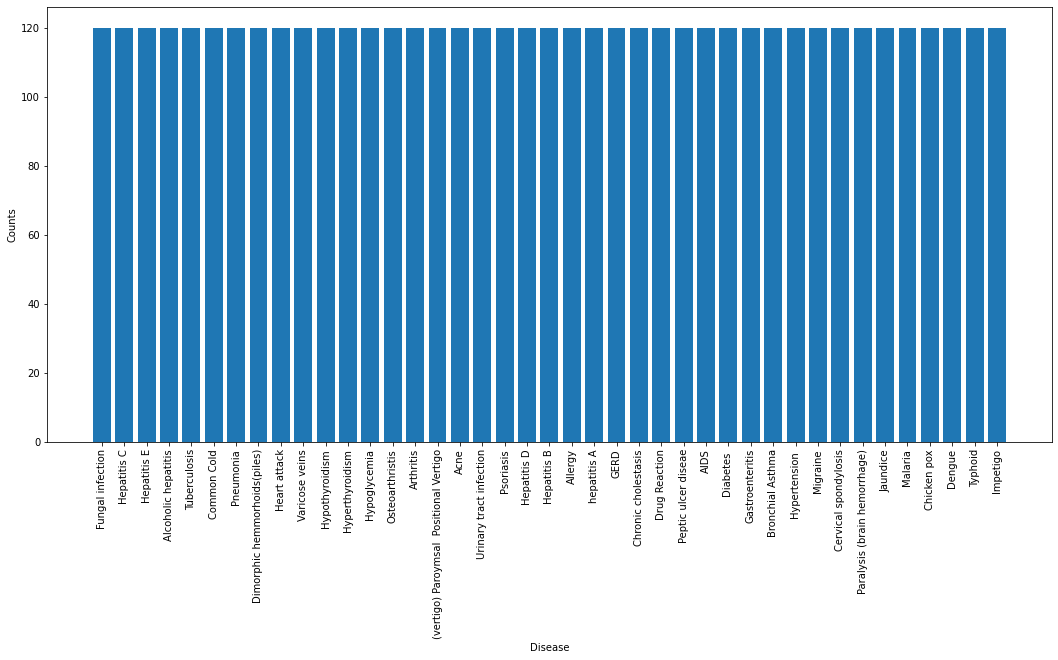

In [7]:
import matplotlib.pyplot as plt

# Checking whether the datasetset is balanced or not
disease_counts = dataset["prognosis"].value_counts()
temp_dframe = pd.DataFrame({
	"Disease": disease_counts.index,
	"Counts": disease_counts.values
})

plt.figure(figsize = (18,8))
plt.bar(disease_counts.index,disease_counts.values)
plt.xlabel("Disease")
plt.ylabel("Counts")
plt.xticks(rotation=90)
plt.show()


In [8]:
# Importing libraries
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Encoding the target value into numerical
# value using LabelEncoder
encoder = LabelEncoder()
dataset["prognosis"] = encoder.fit_transform(dataset["prognosis"])


# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, x, y):
	return accuracy_score(y, estimator.predict(x))

# Initializing Models
models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(),
    "Bernoulli NB":BernoulliNB()  
}

# Producing cross validation score for the models
for model_name in models:
	model = models[model_name]
	scores = cross_val_score(model, x, y, cv = 10,
							n_jobs = -1,
							scoring = cv_scoring)
	print("=="*20)
	print(model_name)
	print(f"\nScores: {scores}")
	print(f"Mean Score: {np.mean(scores)}")

SVC

Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB

Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest

Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Bernoulli NB

Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


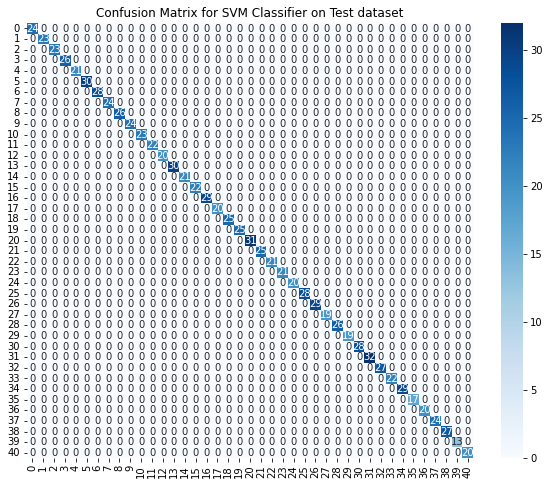


Accuracy on train dataset by SVM Classifier-80%: 100.0

Accuracy on test dataset by SVM Classifier-20%: 100.0


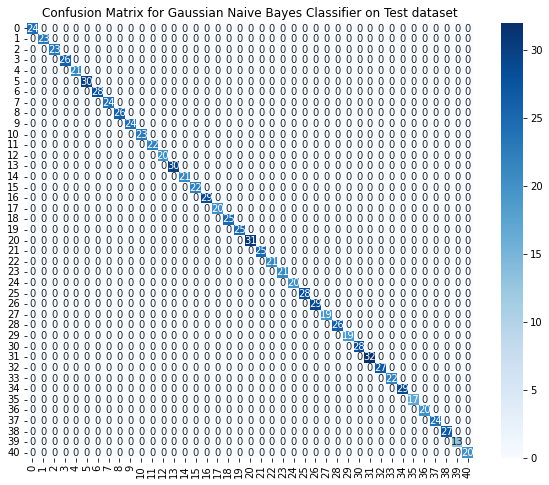


Accuracy on train dataset by Gaussian Naive Bayes Classifier-80%: 100.0

Accuracy on test dataset by Gaussian Naive Bayes Classifier-20%: 100.0




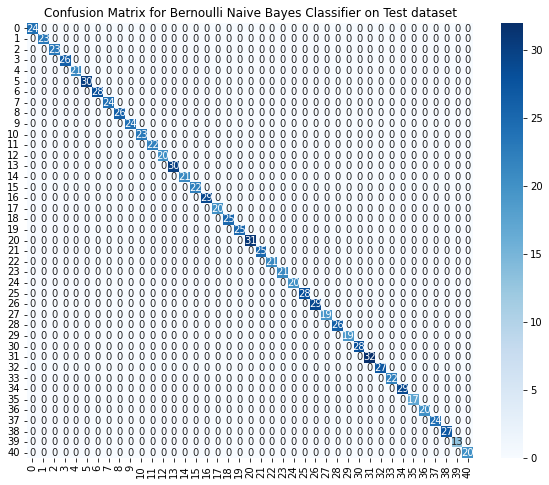


Accuracy on train dataset by Bernoulli Naive Bayes Classifier-80%: 100.0

Accuracy on test dataset by Bernoulli Naive Bayes Classifier-20%: 100.0




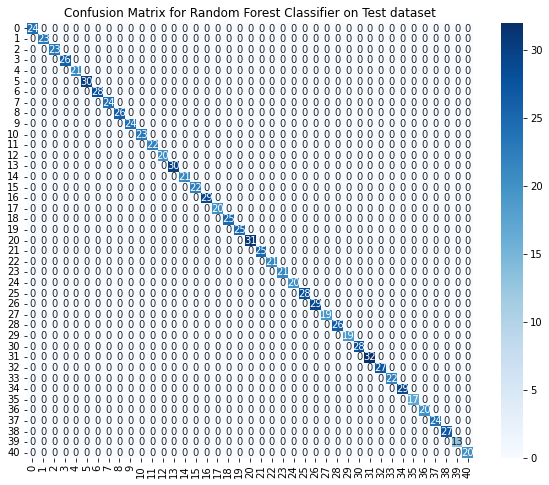


Accuracy on train dataset by Random Forest Classifier-80%: 100.0

Accuracy on test dataset by Random Forest Classifier-20%: 100.0


In [9]:
from sklearn.metrics import confusion_matrix

import seaborn as sns


# Training and testing SVM Classifier
svm_model = SVC()
svm_model.fit(x_train, y_train)
prediction = svm_model.predict(x_test)


cf_matrix = confusion_matrix(y_test, prediction)
plt.figure(figsize=(10,8))
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.title("Confusion Matrix for SVM Classifier on Test dataset")
plt.show()

print(f"\nAccuracy on train dataset by SVM Classifier-80%\
: {accuracy_score(y_train, svm_model.predict(x_train))*100}")
print(f"\nAccuracy on test dataset by SVM Classifier-20%\
: {accuracy_score(y_test, prediction)*100}")

# Training and testing Gaussian Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
prediction = nb_model.predict(x_test)

cf_matrix = confusion_matrix(y_test, prediction)
plt.figure(figsize=(10,8))
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.title("Confusion Matrix for Gaussian Naive Bayes Classifier on Test dataset")
plt.show()

print(f"\nAccuracy on train dataset by Gaussian Naive Bayes Classifier-80%\
: {accuracy_score(y_train, nb_model.predict(x_train))*100}")
print(f"\nAccuracy on test dataset by Gaussian Naive Bayes Classifier-20%\
: {accuracy_score(y_test, prediction)*100}")
print("\n")

# Training and testing Bernoulli Naive Bayes Classifier
nb_model = BernoulliNB()
nb_model.fit(x_train, y_train)
prediction = nb_model.predict(x_test)

cf_matrix = confusion_matrix(y_test, prediction)
plt.figure(figsize=(10,8))
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.title("Confusion Matrix for Bernoulli Naive Bayes Classifier on Test dataset")
plt.show()

print(f"\nAccuracy on train dataset by Bernoulli Naive Bayes Classifier-80%\
: {accuracy_score(y_train, nb_model.predict(x_train))*100}")
print(f"\nAccuracy on test dataset by Bernoulli Naive Bayes Classifier-20%\
: {accuracy_score(y_test, prediction)*100}")
print("\n")

# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
prediction = rf_model.predict(x_test)

cf_matrix = confusion_matrix(y_test, prediction)
plt.figure(figsize=(10,8))
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.title("Confusion Matrix for Random Forest Classifier on Test dataset")
plt.show()

print(f"\nAccuracy on train dataset by Random Forest Classifier-80%\
: {accuracy_score(y_train, rf_model.predict(x_train))*100}")

print(f"\nAccuracy on test dataset by Random Forest Classifier-20%\
: {accuracy_score(y_test, prediction)*100}")


Accuracy on Test dataset by the combined model: 100.0


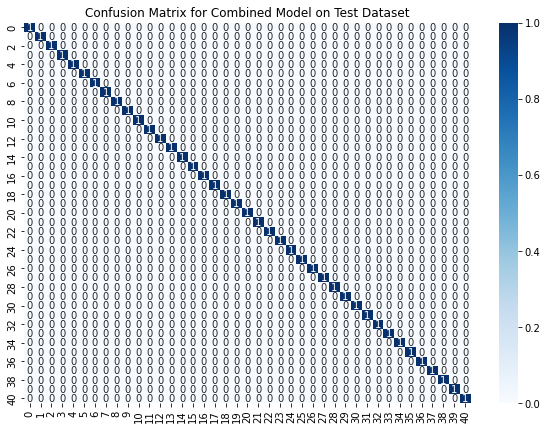

c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


Predictions by each model and combined prediction: 


In [10]:
#final

# Importing libraries
from scipy.stats import mode
from PIL import ImageTk, Image
from tkinter import *

# Reading the train.csv by removing the
# last column since it's an empty column
path = "E:\Med dataset\Training2.csv"
dataset = pd.read_csv(path).dropna(axis = 1)


# Encoding the target value into numerical
# value using LabelEncoder
encoder = LabelEncoder()
dataset["prognosis"] = encoder.fit_transform(dataset["prognosis"])

x = dataset.iloc[:,:-1]
y = dataset.iloc[:, -1]

# Training the models on whole data
svm_model = SVC()
nb_model = GaussianNB()
rf_model = RandomForestClassifier()
bnb_model = BernoulliNB()

svm_model.fit(x, y)
nb_model.fit(x, y)
rf_model.fit(x, y)
bnb_model.fit(x, y)

# Reading the test data
testing_data = pd.read_csv("E:\Med dataset\Testing.csv").dropna(axis=1)

test_X = testing_data.iloc[:, :-1]
test_Y = encoder.transform(testing_data.iloc[:, -1])

# Making prediction by take mode of predictions
# made by all the classifiers
svm_prediction = svm_model.predict(test_X)
nb_prediction = nb_model.predict(test_X)
rf_prediction = rf_model.predict(test_X)
bnb_prediction = bnb_model.predict(test_X)

final_prediction = [mode([i,j,k,l])[0][0] for i,j,
            k,l in zip(svm_prediction, nb_prediction, rf_prediction, bnb_prediction)]

print(f"\nAccuracy on Test dataset by the combined model\
: {accuracy_score(test_Y, final_prediction)*100}")

cf_matrix = confusion_matrix(test_Y, final_prediction)
plt.figure(figsize=(10,7))

sns.heatmap(cf_matrix, annot = True, cmap='Blues')
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()

symptoms = x.columns.values

# Creating a symptom index dictionary to encode the
# input symptoms into numerical form
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index

data_dict = {
    "symptom_index":symptom_index,
    "predictions_classes":encoder.classes_
}

# Defining the Function
# Input: string containing symptoms separated by commmas
# Output: Generated predictions by models
def predictDisease(symptoms):
    symptoms = symptoms.split(",")
    
    # creating input data for the models
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict['symptom_index'][symptom]
        input_data[index] = 1
        
    # reshaping the input data and converting it
    # into suitable format for model predictions
    input_data = np.array(input_data).reshape(1,-1)
    
    # generating individual outputs
    rf_prediction = data_dict["predictions_classes"][rf_model.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][nb_model.predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][svm_model.predict(input_data)[0]]
    bnb_prediction = data_dict["predictions_classes"][bnb_model.predict(input_data)[0]]
    
    # making final prediction by taking mode of all predictions
    final_prediction = mode([rf_prediction, nb_prediction, svm_prediction,bnb_prediction])[0][0]
    predictions = {
        "Random Forest prediction": rf_prediction,
        "Gaussian Naive Bayes prediction": nb_prediction,
        "Support Vector Classifier prediction": svm_prediction,
        "Bernoulli Naive Bayes prediction": bnb_prediction,
        "Combined prediction":final_prediction
    }
    return predictions

#Provide symptoms here for predicitions
print("\n")
inp = input("Enter the symptoms: ")
predicted_output = predictDisease(inp)
print("Predictions by each model and combined prediction: ")


root = Tk()
root.title("DISEASE PREDICTION")
root.geometry("1920x1080")
root.configure(bg="wheat1")
bg = PhotoImage(file=r"C:\Users\vishw\OneDrive\Desktop\robot.png", master=root)
label1 = Label( root, image = bg)
label1.place(x = 10,y = 50)

bg1 = PhotoImage(file=r"C:\Users\vishw\Downloads\robo2.png", master=root)
label1 = Label( root, image = bg1)
label1.place(x = 1200,y = 200)

l4 = Label(root,text="Symptoms encoutered: "+inp,bg="grey",fg="white",font=("Arial", 15)).pack()
l = Label(root,text="\n\n\n").pack()

list = [(k, v) for k, v in predicted_output.items()]
lab = Label(root,text="PREDICTIONS",bg="black",fg="white",font=("Arial", 25))
lab.pack()
l = Label(root,text="\n\n\n")
l.pack()
for i in range(0,4):
    label = Label(root,text="Model: "+list[i][0],bg="skyblue",bd=10,font=("Arial", 14))
    label.pack()
    l1 = Label(root,text="Prediction: "+list[i][1],bg="light green",font=("Arial", 13))
    l1.pack()
l3= Label(root,text="\n\n\n")
l3.pack()
l2 = Label(root,text="Combined Prediction:  "+list[4][1],bg="#856ff8",bd=8,fg="white",font=("Arial", 16))
l2.pack()
root.mainloop()
